<a href="https://colab.research.google.com/github/m0sfe/Supermarket-Sales-Analysis/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/SuperMarket Analysis (2).csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
dtype: int64


In [ ]:
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 0


In [ ]:
print("\nUpdated dtypes:")
print(df.dtypes)


Updated dtypes:
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Sales                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Month                           period[M]
dtype: object


In [ ]:
group_cols = ["Branch", "Customer type", "Gender", "Payment"]

for col in group_cols:
    print("\n===============================")
    print(f"Sales stats grouped by {col}")
    print(df.groupby(col)["Sales"].agg(["mean", "median", "min", "max"]))



Sales stats grouped by Branch
              mean     median      min      max
Branch                                         
Alex    312.354031  240.82800  12.6945  1039.29
Cairo   319.872506  252.88200  18.6375  1022.49
Giza    337.099715  271.41975  10.6785  1042.65

Sales stats grouped by Customer type
                     mean   median      min      max
Customer type                                       
Member         335.742945  271.950  10.6785  1042.65
Normal         306.372379  225.792  12.6945  1039.29

Sales stats grouped by Gender
              mean   median      min      max
Gender                                       
Female  340.931414  284.193  12.6945  1042.65
Male    299.055738  214.746  10.6785  1039.29

Sales stats grouped by Payment
                   mean   median      min      max
Payment                                           
Cash         326.181890  262.962  10.6785  1003.59
Credit card  324.009878  239.589  12.6945  1042.65
Ewallet      318.820600  253

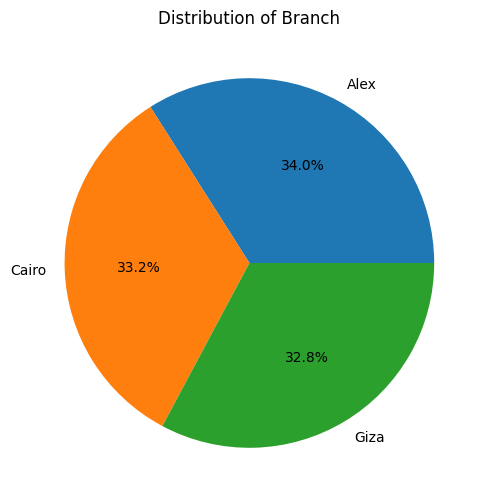

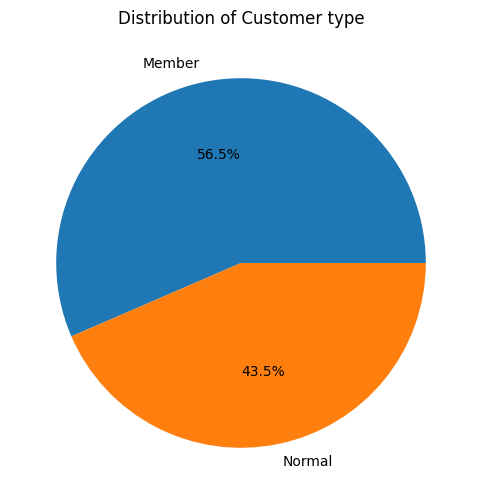

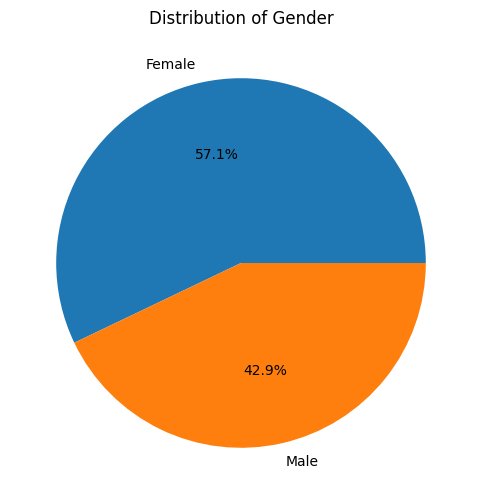

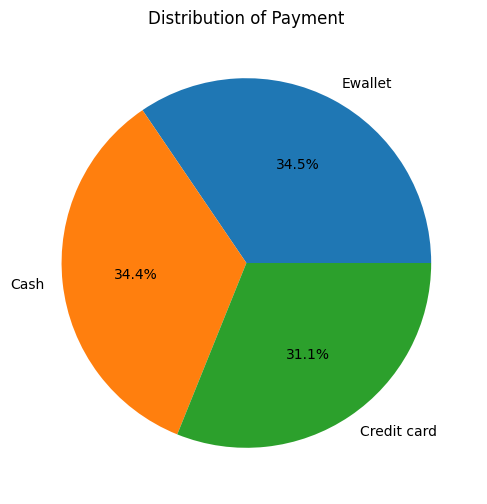

In [ ]:

cols = ["Branch", "Customer type", "Gender", "Payment"]

for col in cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"Distribution of {col}")
    plt.ylabel("")
    plt.show()

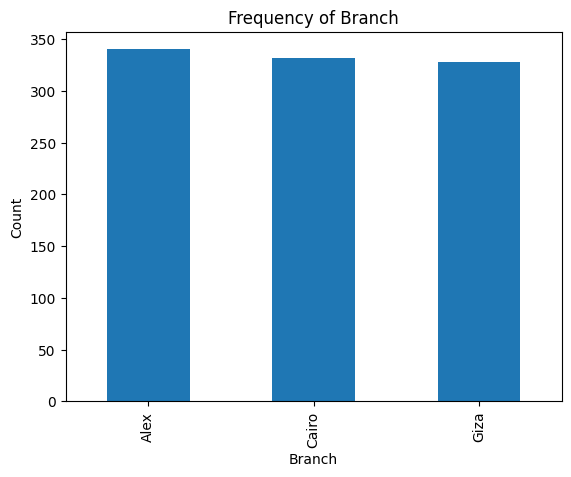

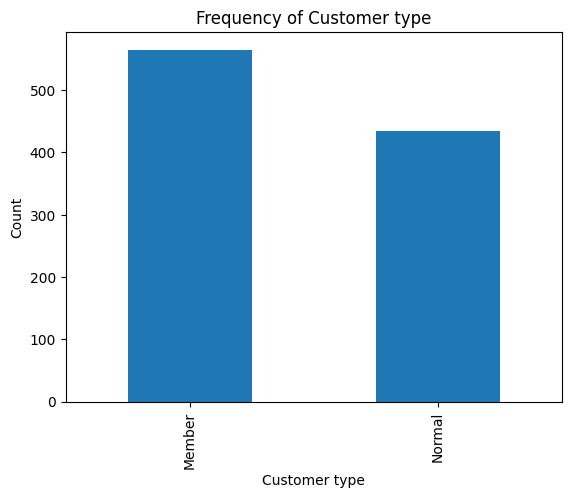

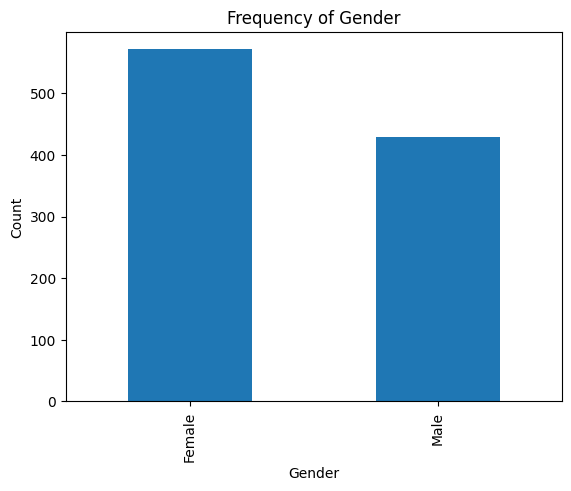

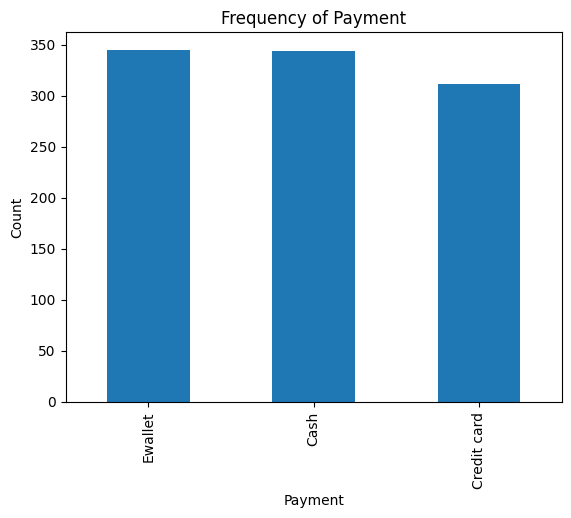

In [ ]:
import matplotlib.pyplot as plt

cat_cols = ["Branch", "Customer type", "Gender", "Payment"]

for col in cat_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



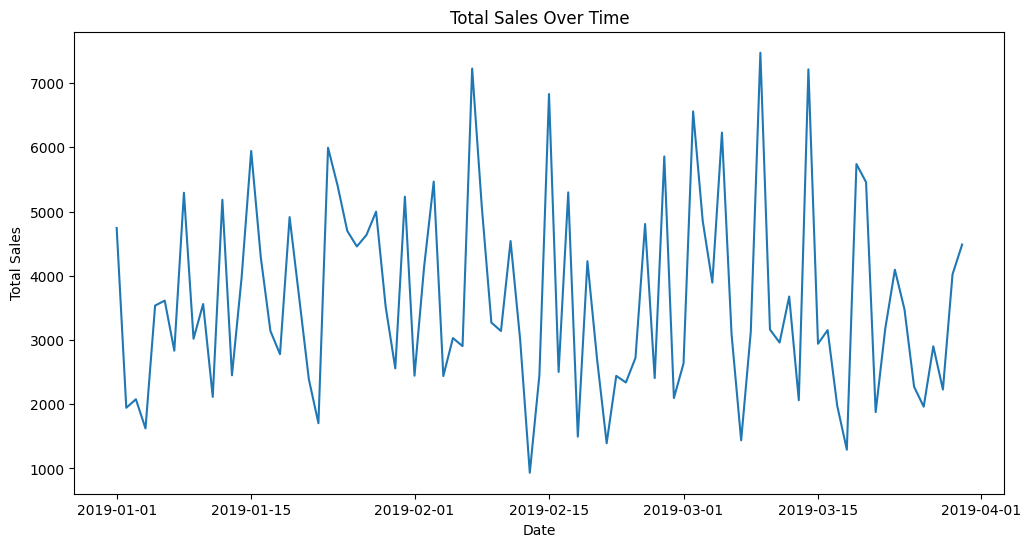

In [ ]:
sales_over_time = df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

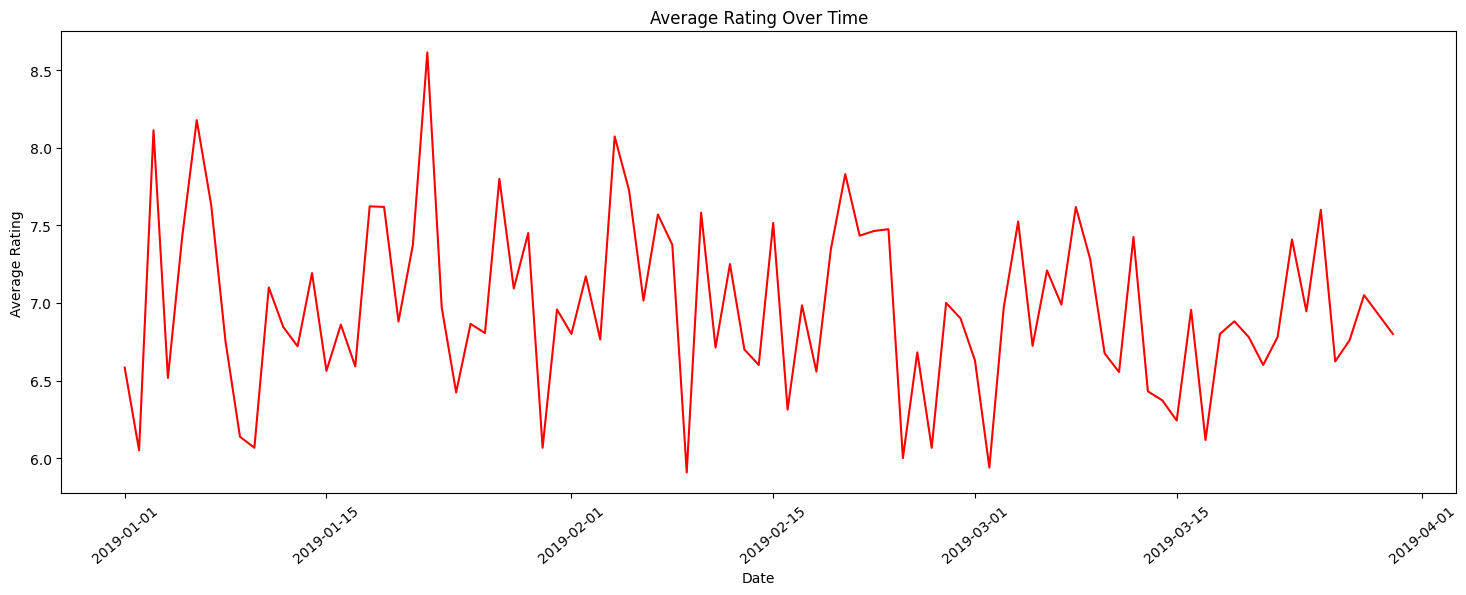

In [ ]:
rating_over_time = df.groupby("Date")["Rating"].mean()

plt.figure(figsize=(18,6))
plt.plot(rating_over_time.index, rating_over_time.values,color="red")
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.xticks(rotation=40)
plt.show()


Text(0.5, 1.0, 'Sales vs. Rating')

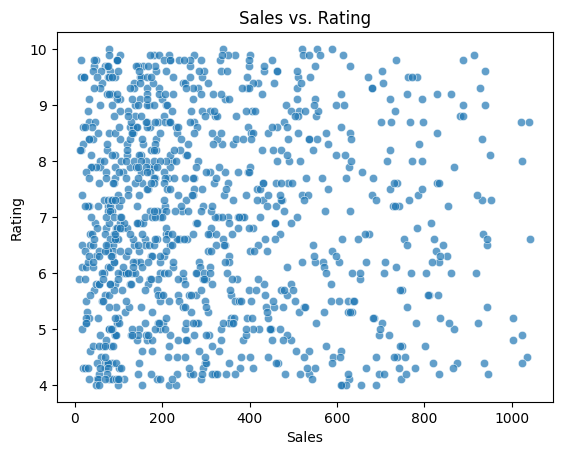

In [ ]:

sns.scatterplot(data=df, x='Sales', y='Rating', alpha=0.7)
plt.title('Sales vs. Rating')

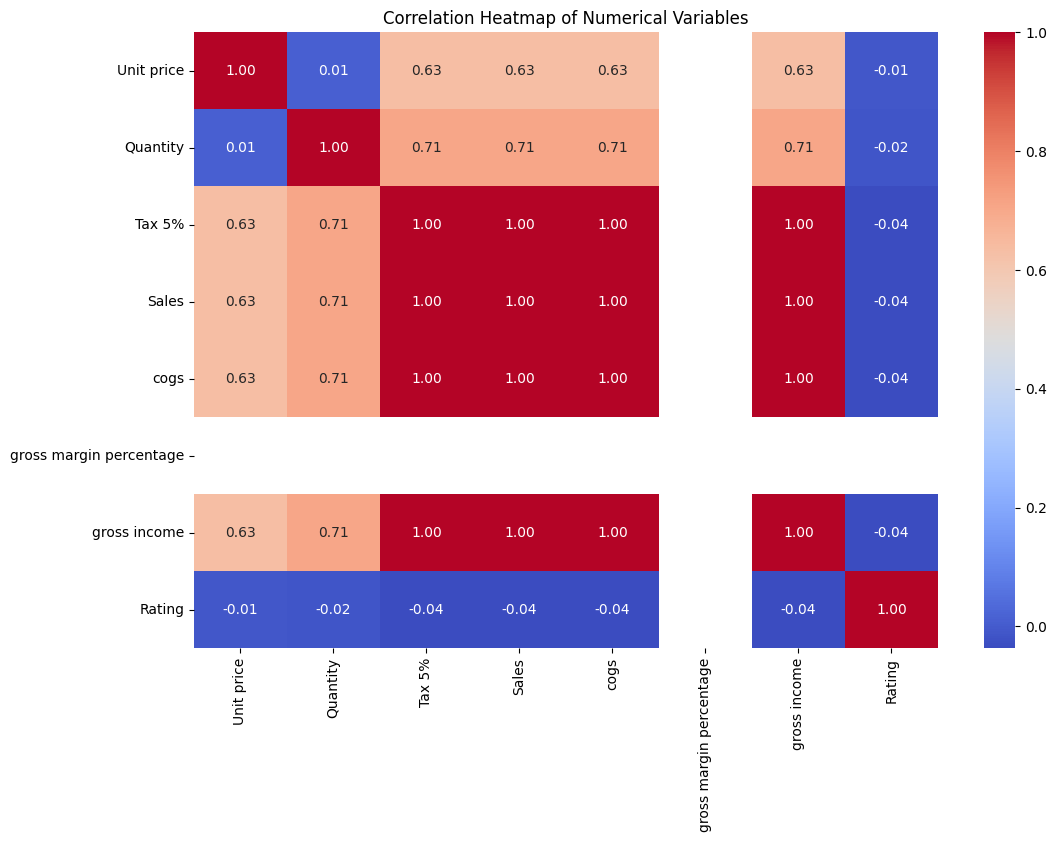

In [ ]:
plt.figure(figsize=(12,8))

corr = df.corr(numeric_only=[True])

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

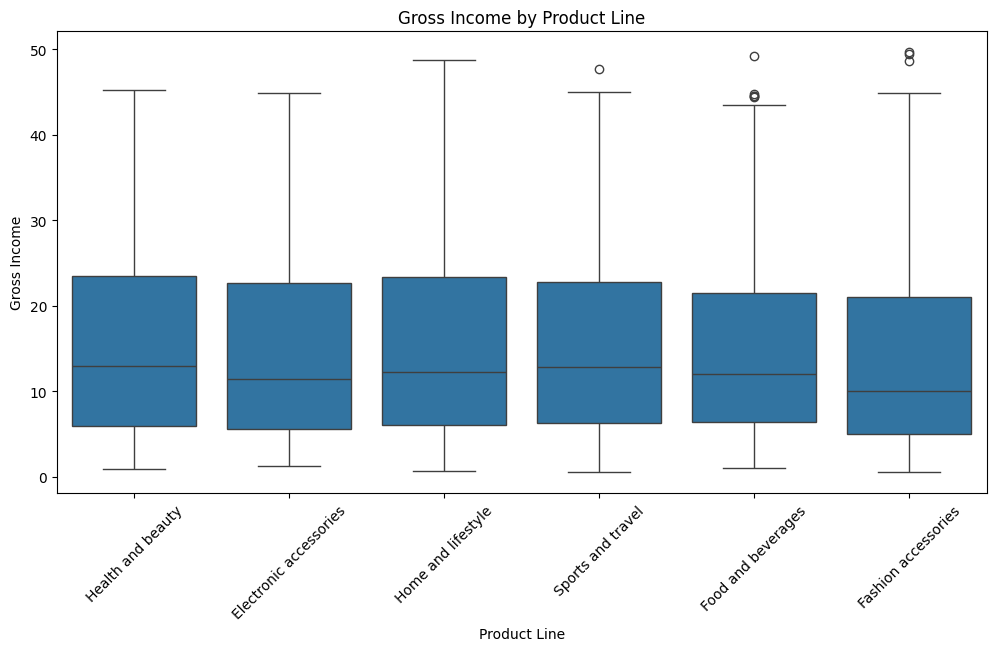

In [ ]:

plt.figure(figsize=(12,6))
sns.boxplot(x="Product line", y="gross income", data=df)

plt.title("Gross Income by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Gross Income")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 1. Revenue Metrics
total_revenue = df['Sales'].sum()
total_gross_income = df['gross income'].sum()
avg_sales = df['Sales'].mean()

print("--- Overall Revenue Metrics ---")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Gross Income: ${total_gross_income:,.2f}")
print(f"Average Sales per Transaction: ${avg_sales:,.2f}")


--- Overall Revenue Metrics ---
Total Revenue: $322,966.75
Total Gross Income: $15,379.37
Average Sales per Transaction: $322.97


In [ ]:
product_line_stats = df.groupby('Product line').agg({
    'Sales': ['sum', 'mean', 'count'],
    'gross income': ['sum','mean'],
    'Rating': 'mean'
}).sort_values(('Sales', 'sum'), ascending=False)

print("\n--- Product Line Statistics ---")
print(product_line_stats)


--- Product Line Statistics ---
                             Sales                   gross income             \
                               sum        mean count          sum       mean   
Product line                                                                   
Food and beverages      56144.8440  322.671517   174    2673.5640  15.365310   
Sports and travel       55122.8265  332.065220   166    2624.8965  15.812630   
Electronic accessories  54337.5315  319.632538   170    2587.5015  15.220597   
Fashion accessories     54305.8950  305.089298   178    2585.9950  14.528062   
Home and lifestyle      53861.9130  336.636956   160    2564.8530  16.030331   
Health and beauty       49193.7390  323.643020   152    2342.5590  15.411572   

                          Rating  
                            mean  
Product line                      
Food and beverages      7.113218  
Sports and travel       6.916265  
Electronic accessories  6.924706  
Fashion accessories     7.029213  
H

In [ ]:
correlations = df.select_dtypes(include=[np.number]).corr()['Sales'].sort_values(ascending=False)
print("\n--- Correlations with Sales ---")
print(correlations)



--- Correlations with Sales ---
Sales                      1.000000
gross income               1.000000
Tax 5%                     1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
Rating                    -0.036442
gross margin percentage         NaN
Name: Sales, dtype: float64


Q1) Which branch generates the highest revenue? Why might that be?

It's the Giza Branch

In [ ]:
branch_revenue = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
print(branch_revenue)


--- Q1: Branch Revenue ---
Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64


Q2) Do members spend more than normal customers?

If Member mean > Normal mean:

Yes, members spend more on average.

In [ ]:

customer_spend = df.groupby('Customer type')['Sales'].agg(['mean', 'sum'])
print(customer_spend)

                     mean         sum
Customer type                        
Member         335.742945  189694.764
Normal         306.372379  133271.985


Q3) Which payment method has the highest usage? Why?

Most used payment method: Ewallet

In [ ]:
payment_usage = df['Payment'].value_counts()
print(payment_usage)


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


Q4) Which product line has the highest average rating?

Highest average rating product line Food and beverages

In [ ]:
product_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
print(product_rating)


Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


Q5) Is there a relationship between unit price and quantity purchased?

A correlation value of 0.01 indicates a very weak relationship between unit price and quantity purchased.

In [ ]:

price_quantity_corr = df['Unit price'].corr(df['Quantity'])
print(f"Correlation: {price_quantity_corr}")

Correlation: 0.01077756434249727
